<h2 style="color:#800f2f;">Fine-Tuning YOLOv8s on Rock-Paper-Scissors Dataset: Training, Validation, and Prediction</h1>


In [ ]:
!pip install ultralytics==8.0.196

## Import necessary libraries

In [ ]:
from IPython import display

import ultralytics

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Setting the Home Directory

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Running YOLOv8m Inference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8m.pt conf=0.5 source='person.jpg'

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/person.jpg: 640x640 1 person, 1 tie, 37.3ms
Speed: 3.8ms preprocess, 37.3ms inference, 549.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Displaying Detection Result

/content


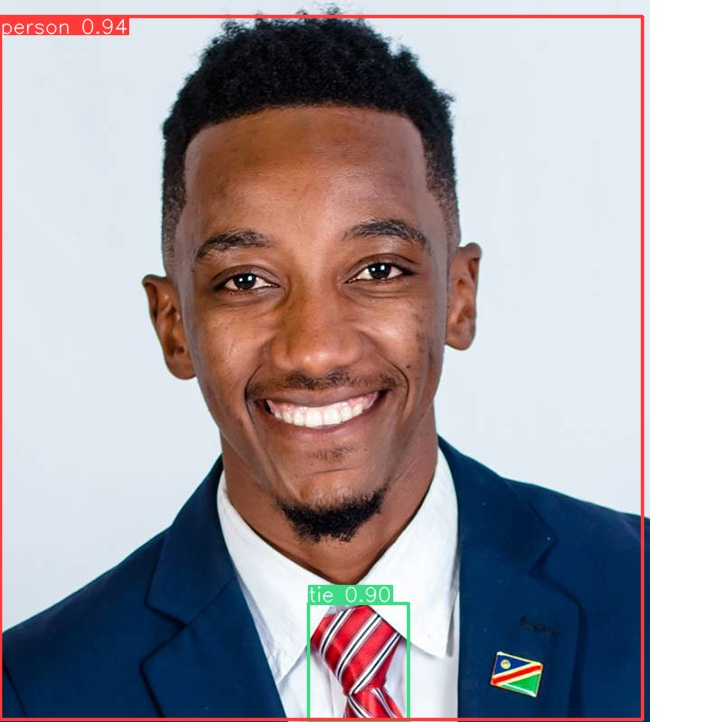

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict5/person.jpg', height=200)

## Installing Roboflow and Downloading the Rock-Paper-Scissors Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key = "vLuEbo4a0LueElKEkWIW")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov8:: 100%|██████████| 14682/14682 [00:01<00:00, 7464.99it/s] 


In [ ]:
pwd

'/content'

##  Training YOLOv8s on the Rock-Paper-Scissors Dataset

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data='data.yaml' epochs=12 imgsz=640


New https://pypi.org/project/ultralytics/8.2.83 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=12, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, 

### Desciption of this part

* this part consist of differnt parts:

1. Model and Training Information

* Ultralytics YOLOv8.0.196: This is the version of the YOLOv8 framework we're using.

* Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB): Specifies the Python version, PyTorch version, and the GPU (CUDA-enabled) used for training.
In this case, a Tesla T4 GPU is being utilized.

2. Model Configuration

* task = detect

* mode = train

* model = yolov8s.pt

* data=data.yaml: Specifies the task (object detection)

* mode (training)

* model type (YOLOv8s)

the dataset configuration file (data.yaml).

epochs=12, batch=16, imgsz=640: Indicates that the model will be trained for 12 epochs with a batch size of 16 and an image size of 640 pixels.

3. Model Summary

* Model summary:

225 layers, 11,136,761 parameters, 11,136,745 gradients, 28.7 GFLOPs: Summarizes the model architecture, including the number of layers, total parameters, gradients, and the computational complexity (measured in Giga Floating Point Operations per second, GFLOPs).

4. Transferred Weights

Transferred 349/355 items from pretrained weights: Indicates that 349 out of 355 components (layers, biases, etc.) of the YOLOv8s model were initialized with weights from a pre-trained model, facilitating transfer learning.

5. Optimizer

AdamW(lr=0.001429, momentum=0.9): Specifies the optimizer used for training, in this case, AdamW with an initial learning rate of 0.001429 and a momentum of 0.9.

6. Epoch Progress and Losses

* GPU_mem:

The amount of GPU memory utilized during training, reported as 4.09 GB during the first epoch.

* box_loss:

The loss associated with bounding box predictions, indicating how well the predicted boxes match the ground truth.

* cls_loss:

The loss associated with class predictions, reflecting how accurately the model predicts the correct class for each detected object.

* dfl_loss:

The loss associated with the Distribution Focal Loss (DFL), a specialized loss function used to improve the precision of bounding box regression.
Instances: The number of instances (detected objects) processed in that batch.

7. Validation Metrics

#### Class, Images, Instances:

Class: Indicates the overall results across all classes.

* Images:

The number of validation images processed (576 in our case).

* Instances:
The total number of object instances in the validation set (400 in our case).

#### Box(P), R, mAP50, mAP50-95:

* P (Precision):

The ratio of true positive detections to the sum of true positives and false positives. It indicates how many of the predicted boxes were correct.

* R (Recall):

The ratio of true positives to the sum of true positives and false negatives. It indicates how many of the actual objects were detected.

* mAP50:

Mean Average Precision at IoU threshold of 0.5. It gives an overall measure of the model’s accuracy in object detection.
mAP50-95: Mean Average Precision averaged across IoU thresholds from 0.5 to 0.95 in steps of 0.05. This is a more stringent measure of the model's performance.

8. Miscellaneous Outputs

* TensorBoard:

Provides a link to visualize training metrics and results using TensorBoard, a popular tool for tracking and visualizing machine learning experiments.

* Automatic Mixed Precision (AMP):

Indicates that the model is using AMP to speed up training by automatically using lower-precision (mixed precision) calculations without sacrificing accuracy.

* Label Scanning and Caching:

The model scans the training and validation datasets to create caches for faster loading in subsequent epochs.

* Image sizes, Logging, and Workers:

The size of images used for training and validation (640 pixels), number of workers (threads) for data loading, and where the training logs are stored.

9. Training Progress

* Epoch Progress Bar:

Shows the progress of each epoch during training, indicating the percentage completed.

* Performance Metrics:

Displays the performance metrics (P, R, mAP50, mAP50-95) after each epoch, allowing you to track the model's improvement.

### Some links to learn more:

* What is Mean Average Precision (mAP)?
https://youtu.be/oqXDdxF_Wuw

* Mean Average Precision (mAP) | Explanation and Implementation for Object Detection
https://youtu.be/duBGmrxNHS8

* NVAITC Webinar: Automatic Mixed Precision Training in PyTorch
https://youtu.be/b5dAmcBKxHg

## Displaying the Confusion Matrix

/content


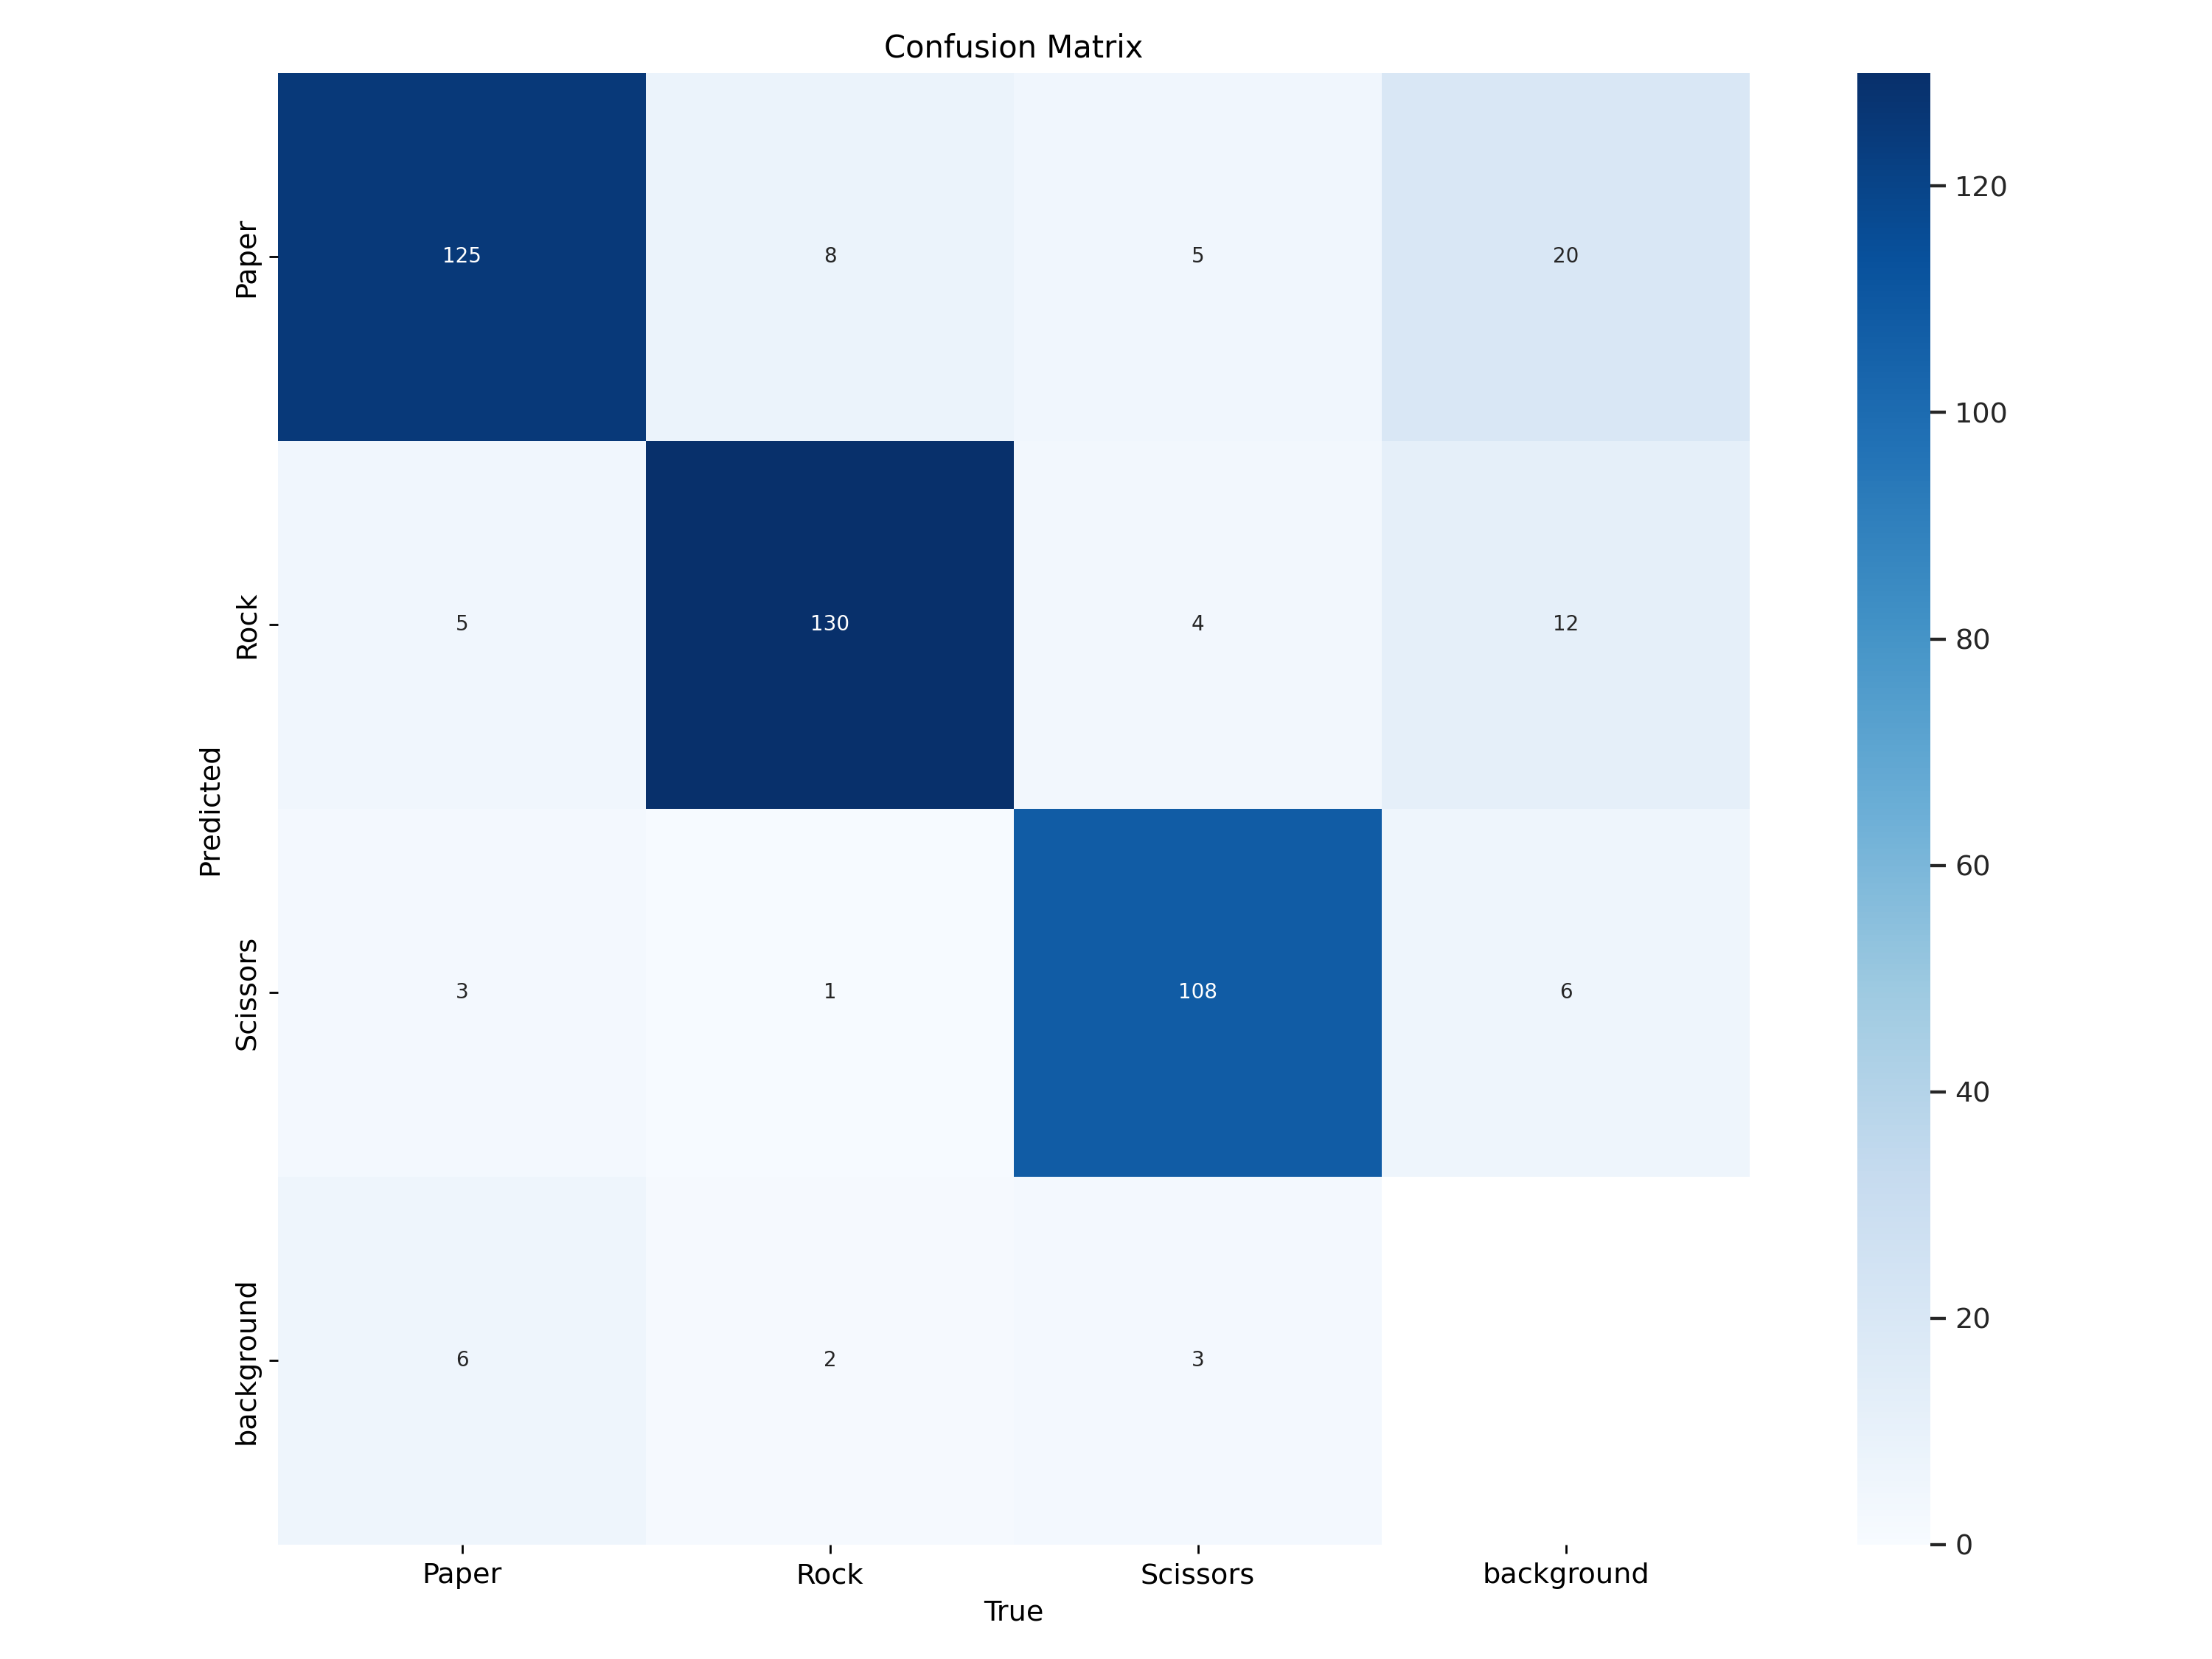

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/confusion_matrix.png', width=600)

## Displaying Training Results

/content


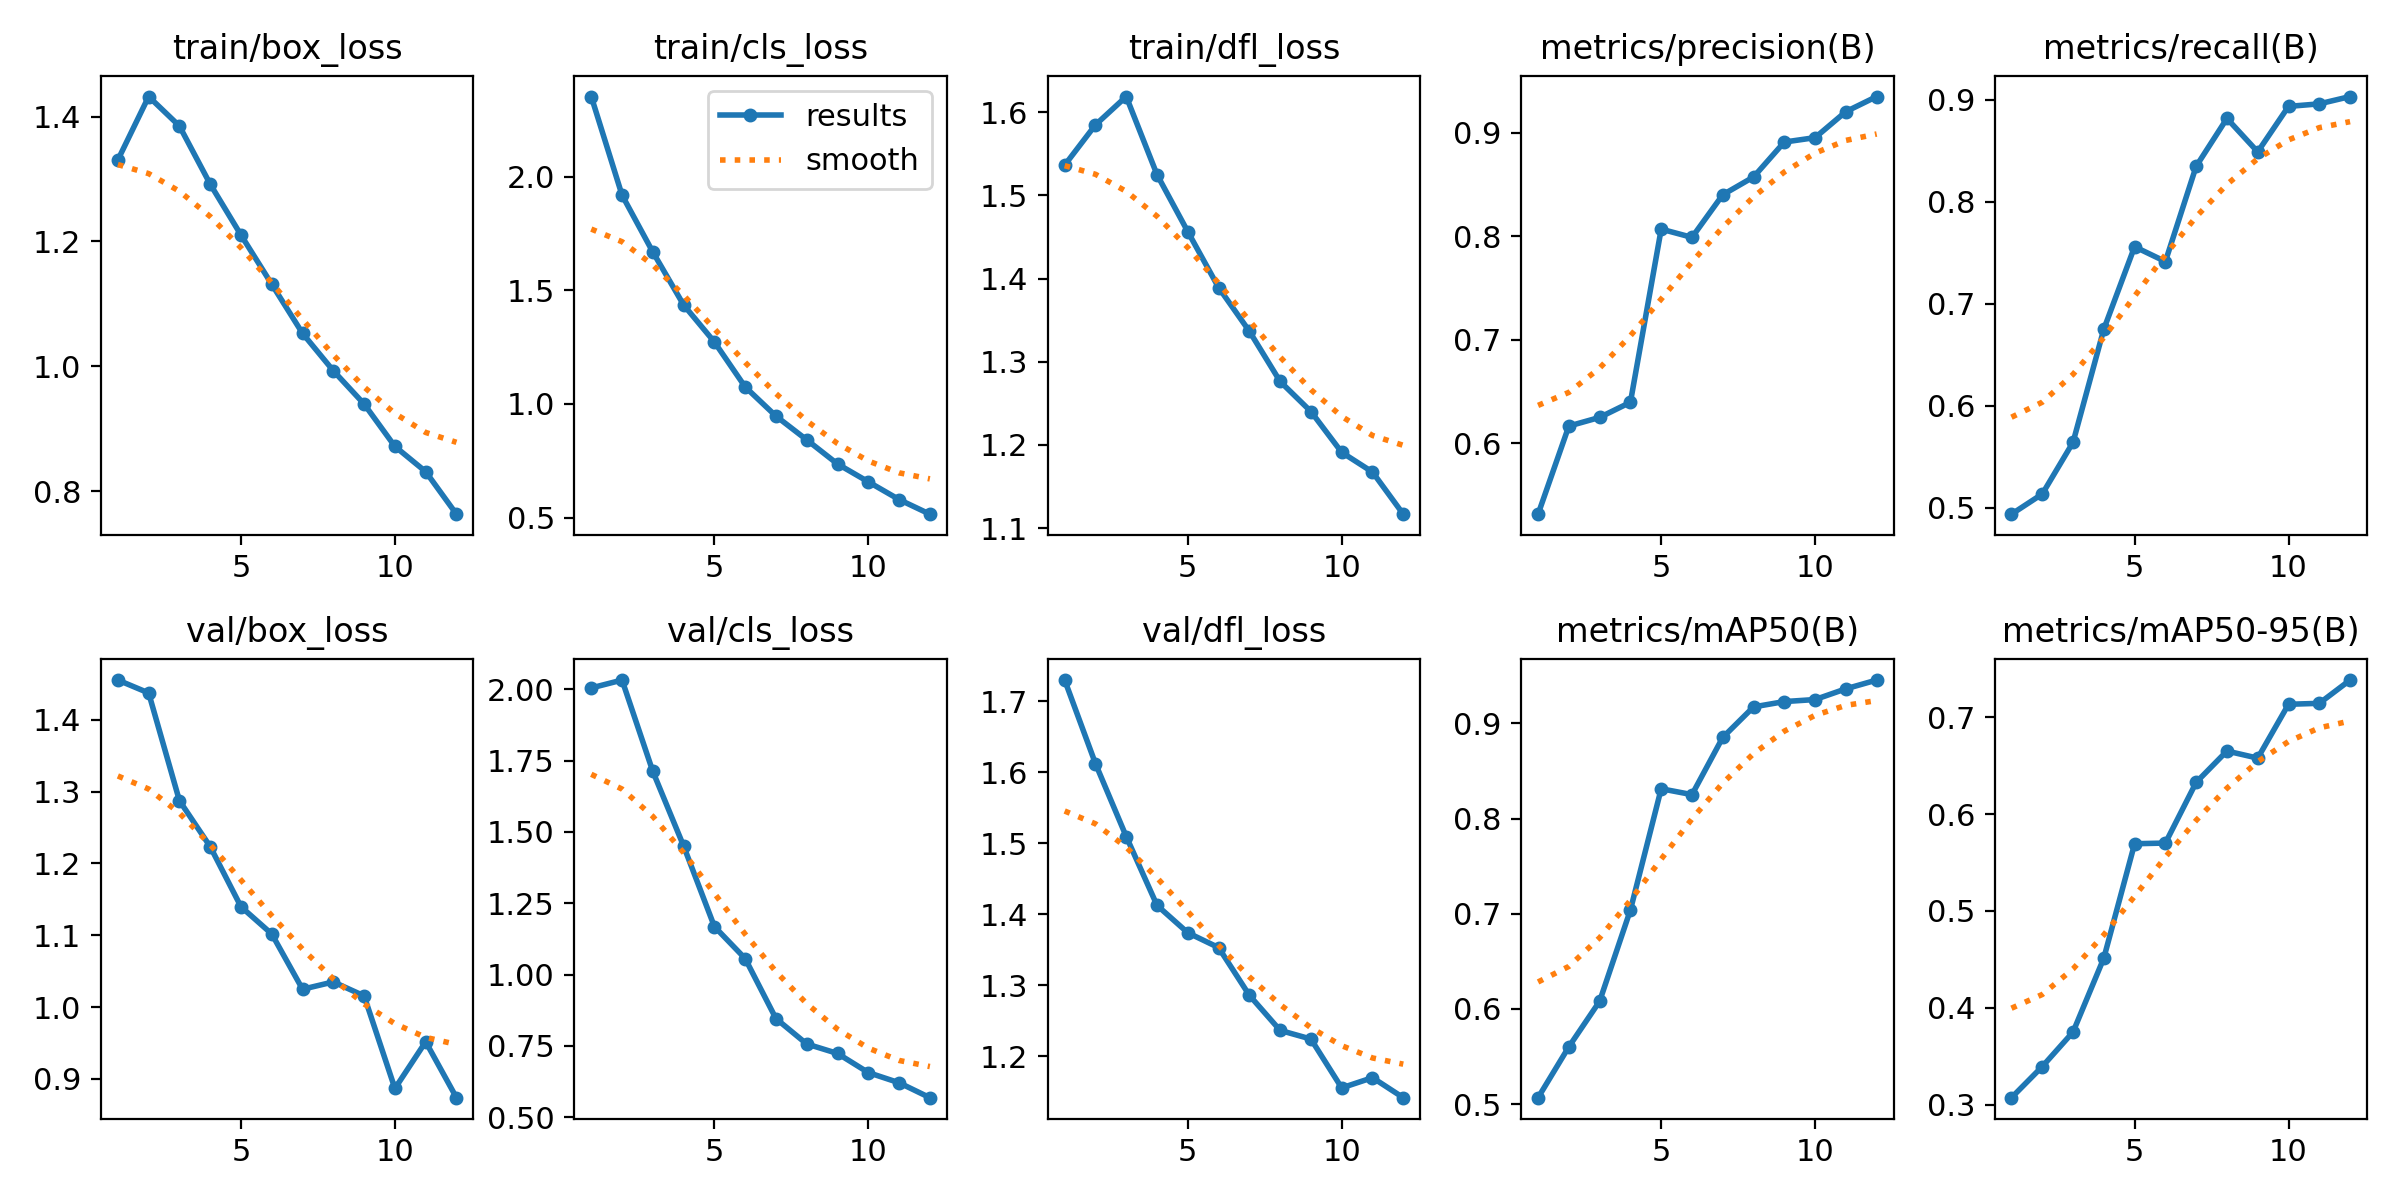

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train5/results.png', width=600)

## Validating the YOLOv8 Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data='data.yaml'


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/rock-paper-scissors-14/valid/labels.cache... 576 images, 238 backgrounds, 0 corrupt: 100% 576/576 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 36/36 [00:10<00:00,  3.52it/s]
                   all        576        400      0.935      0.903      0.946      0.737
                 Paper        576        139        0.9      0.892      0.939      0.719
                  Rock        576        141      0.942      0.914      0.951      0.737
              Scissors        576        120      0.964      0.903      0.947      0.756
Speed: 0.9ms preprocess, 9.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Running YOLOv8 Prediction

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model= /content/runs/detect/train5/weights/best.pt conf=0.25 source='/content/rock-paper-scissors-14/test/images'



/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/304 /content/rock-paper-scissors-14/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 16.3ms
image 2/304 /content/rock-paper-scissors-14/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 16.4ms
image 3/304 /content/rock-paper-scissors-14/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 16.3ms
image 4/304 /content/rock-paper-scissors-14/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 16.3ms
WARNING ⚠️ NMS time limit 0.550s exceeded
image 5/304 /content/rock-paper-scissors-14/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Scissors, 16.4ms
image 6/304 /content/rock-paper-scissors-14/

## Displaying Prediction Results

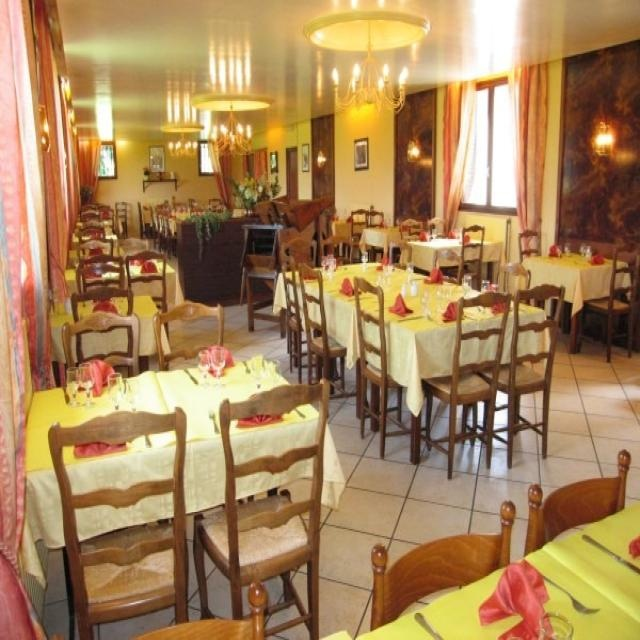

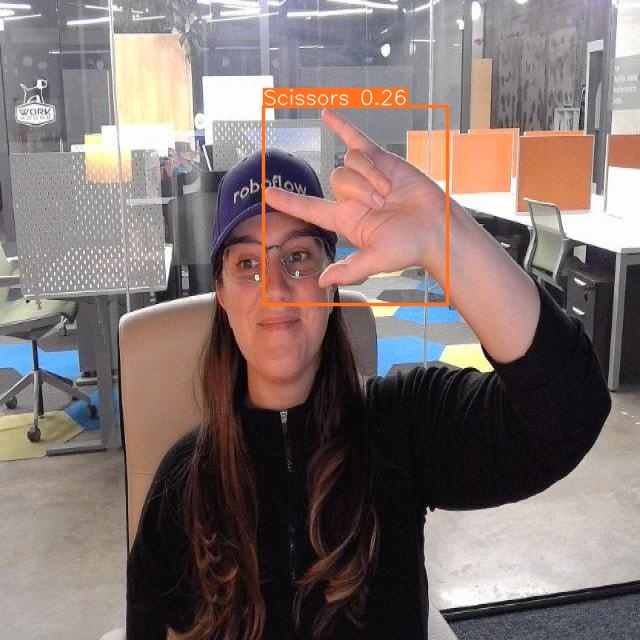

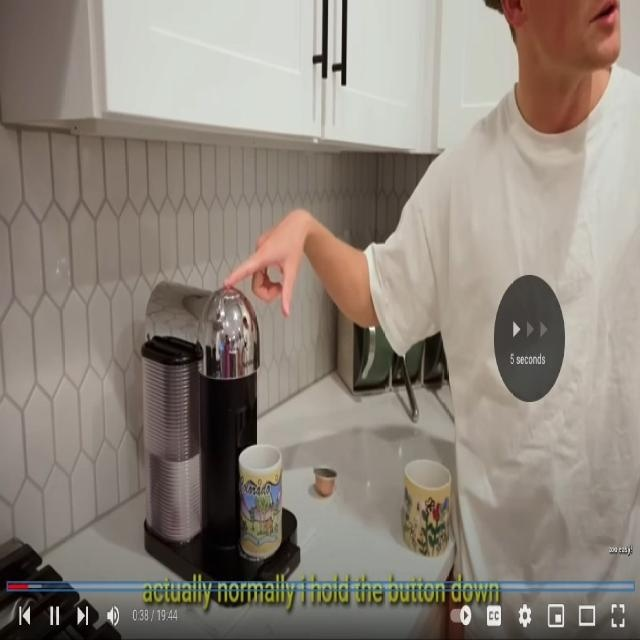

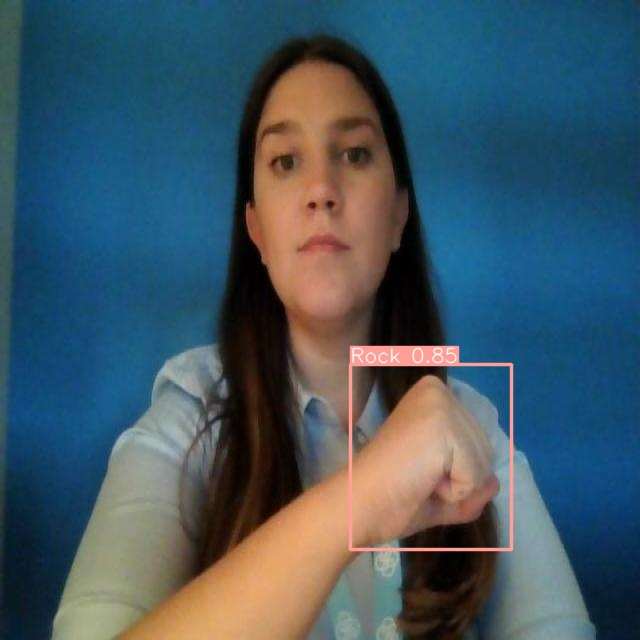

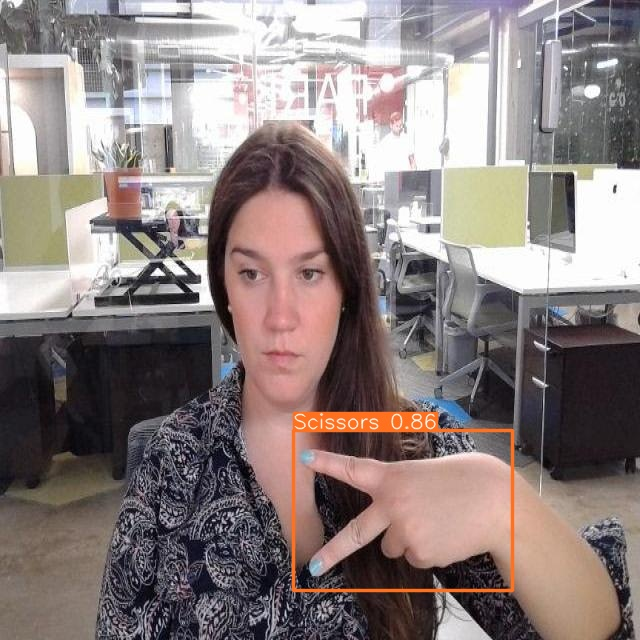

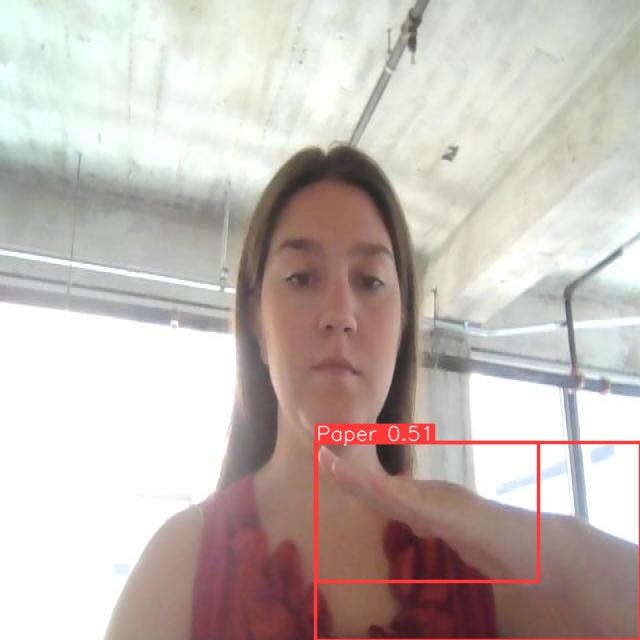

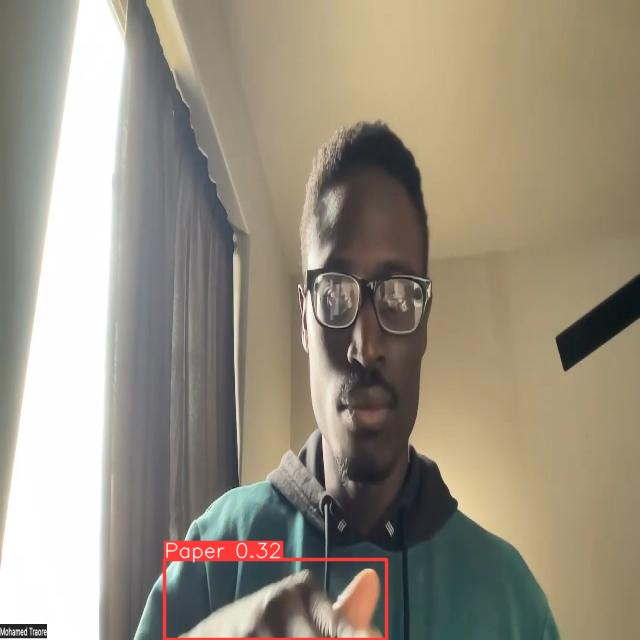

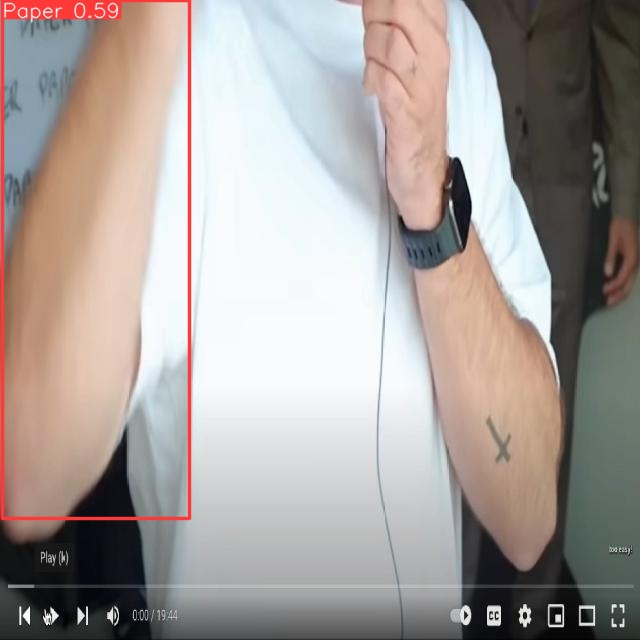

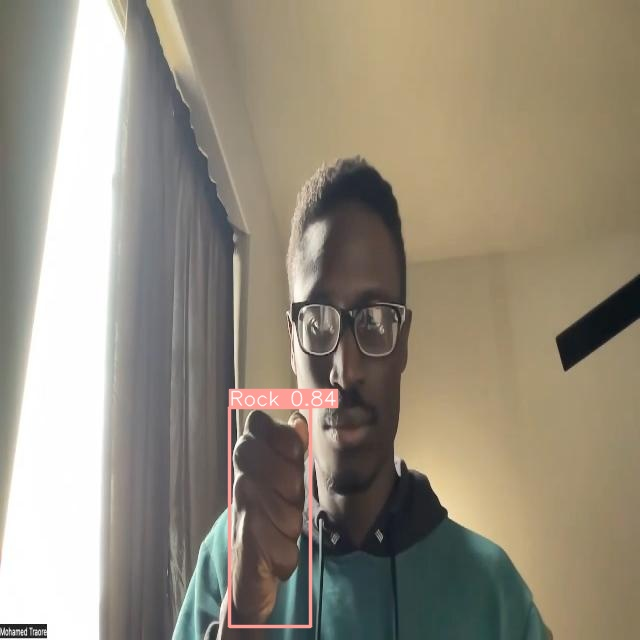

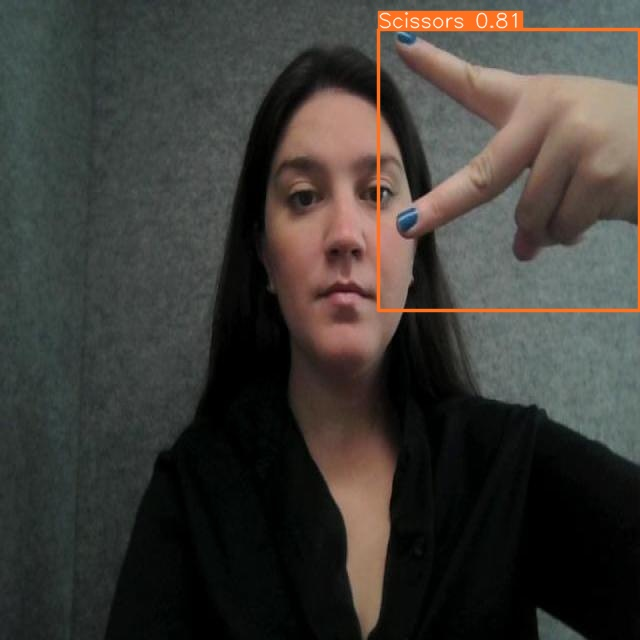

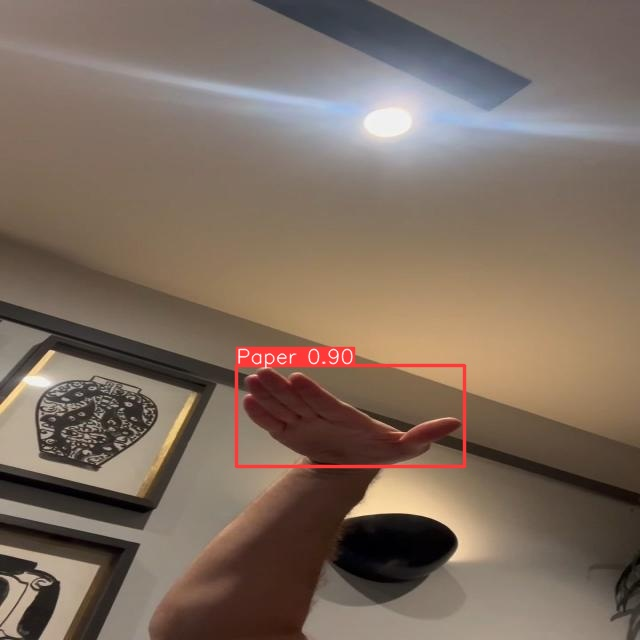

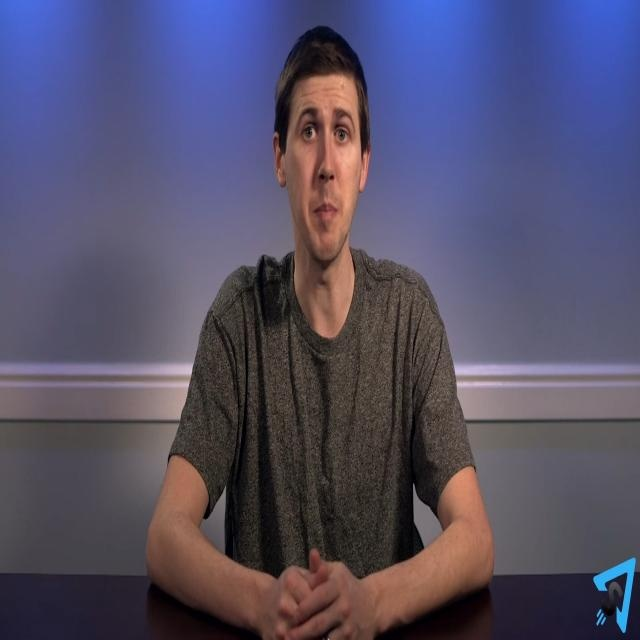

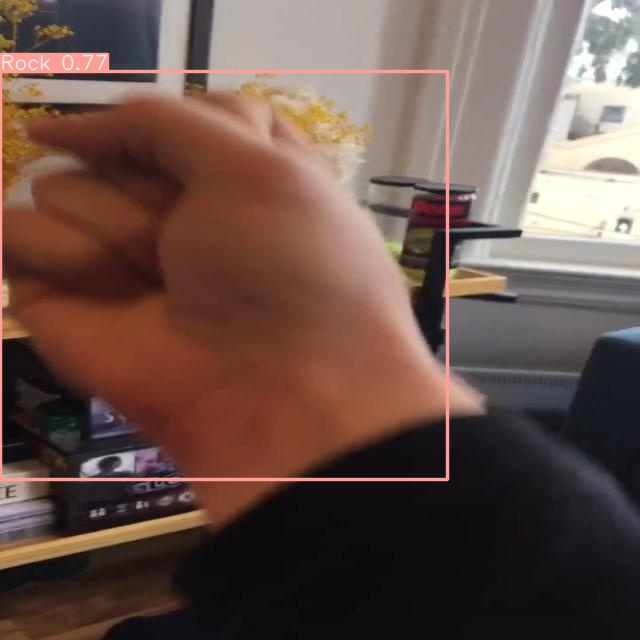

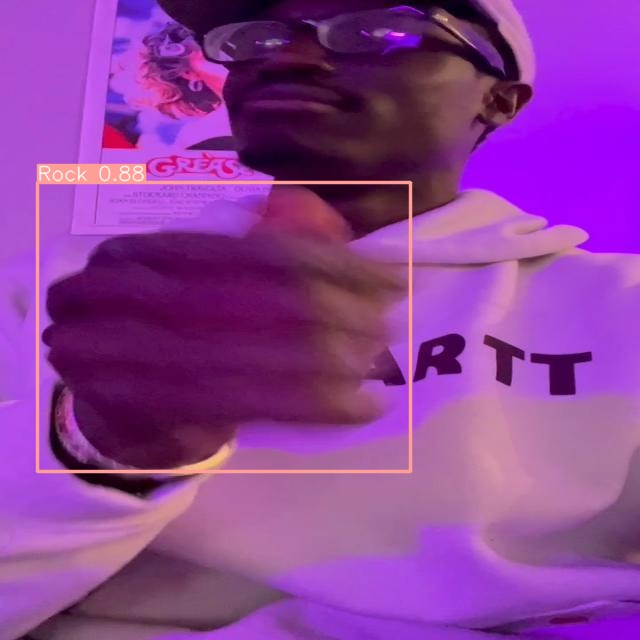

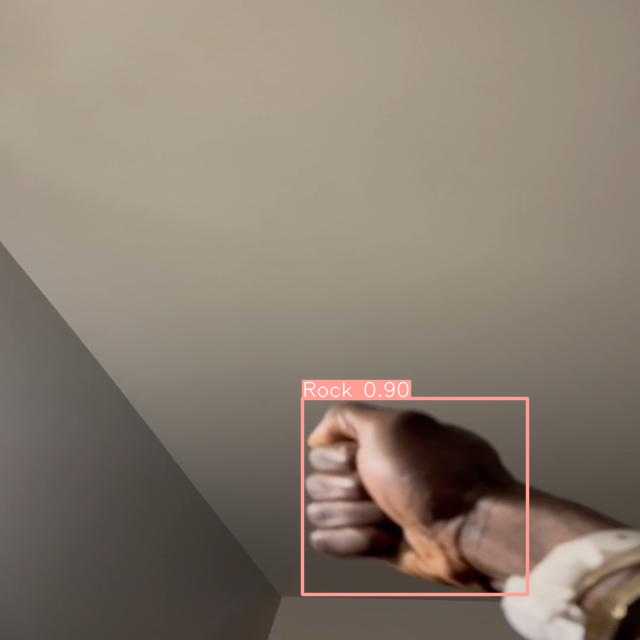

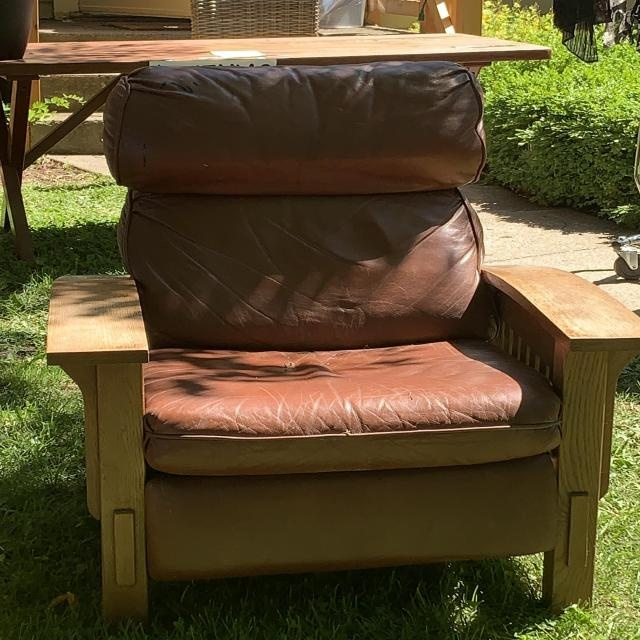

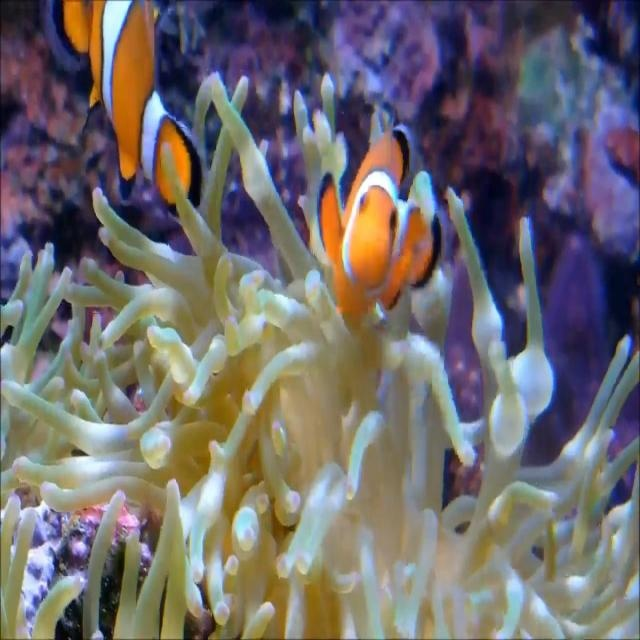

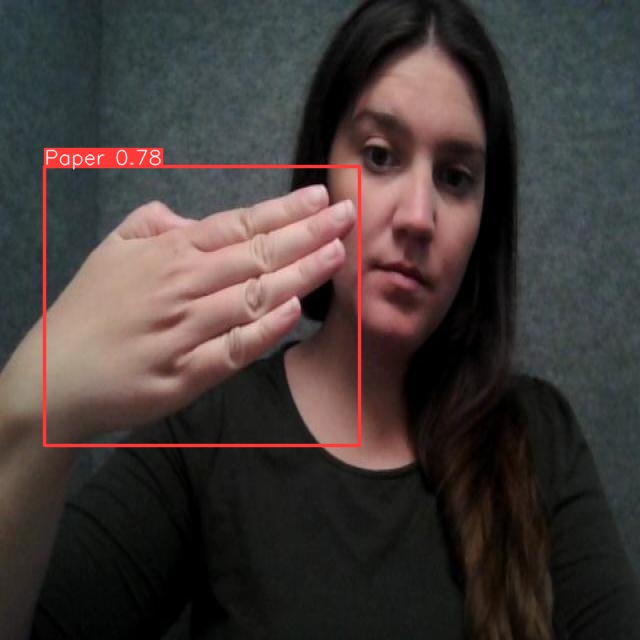

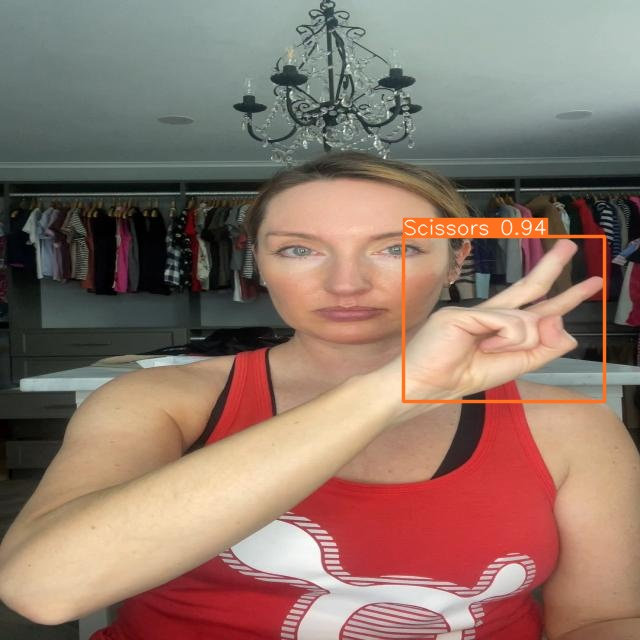

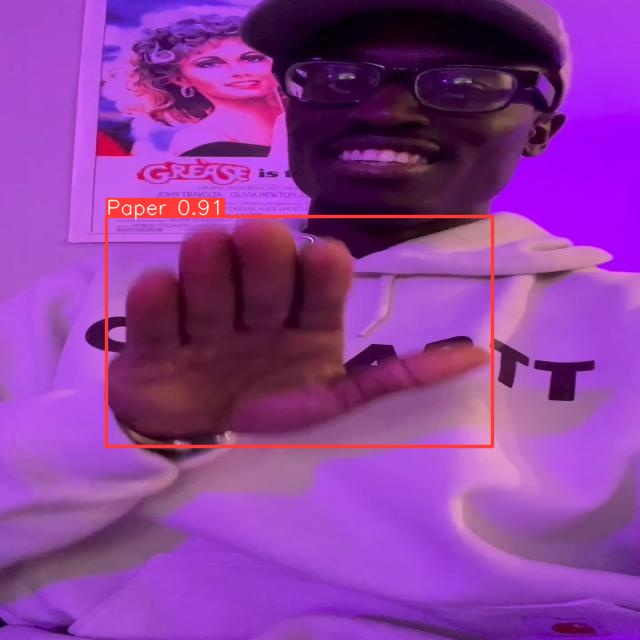

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict6/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

### Refrences:

https://github.com/AhmedIbrahimai/Rock-Paper-Scissors-on-custom-data-using-YOLOv8-Computer-vision/blob/main/README.md

https://www.youtube.com/watch?v=rCMeGLF6bJ0